In [1]:
import numpy as np
import healpy as hp
import astropy
from astropy.io import ascii
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Table
from astropy.table import Table, Column
import pylab
from pylab import plot
from astropy import cosmology
from astropy.cosmology import WMAP9 as cosmo
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3, venn3_circles
%matplotlib inline
%config InlineBackend.figure_format='svg'
%config InlineBackend.figure_format='retina'

In [69]:
print("\033[43;30mLendo os catalogos com footprint\033[m")
w = Table.read('new_w.fits')
r = Table.read('new_r.fits') 
k = Table.read('new_k.vot')

print 'Wen:',len(w)
print 'Rykoff:',len(r)
print 'Koester:', len(k) 

Lendo os catalogos com footprint
Wen: 80917
Rykoff: 18758
Koester: 13611


In [70]:
w = w[w['zph']<0.3]
r = r[r['Z_LAMBDA']<0.3]
k = k[k['zph']<0.3]

In [73]:
print 'Wen:',len(w)
print 'Rykoff:',len(r)
print 'Koester:', len(k) 

Wen: 25402
Rykoff: 5111
Koester: 13309


In [100]:
lista_w = []
for i in xrange(0,len(w)):
    lista_w.append('%.2f_%.2f_%.1f'%(w['RAJ2000'][i], w['DEJ2000'][i], w['zph'][i]))

In [101]:
lista_r = []
for i in xrange(0, len(r)):
    lista_r.append('%.2f_%.2f_%.1f'%(r['RA'][i], r['DEC'][i], r['Z_LAMBDA'][i]))

In [102]:
lista_k = []
for i in xrange(0,len(k)):
    lista_k.append('%.2f_%.2f_%.1f'%(k['RAJ2000'][i], k['DEJ2000'][i], k['zph'][i]))

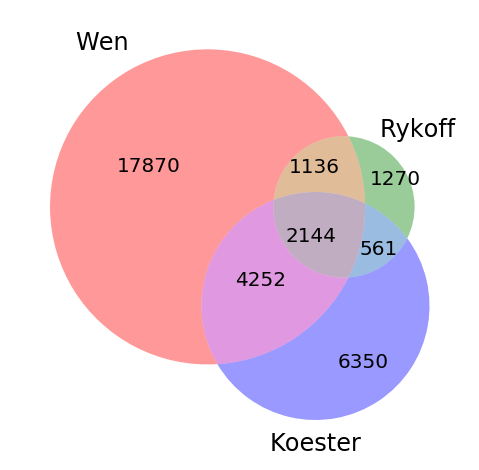

In [103]:
Wen = set(lista_w)
Rykoff = set(lista_r)
Koester = set(lista_k)
venn3([Wen, Rykoff, Koester], ('Wen', 'Rykoff', 'Koester'))
plt.savefig('venn_string.png', dpi=300)

In [106]:
print 17870+1136+2144+4252
print 1136+1270+561+2144
print 2144+561+6350+4252

25402
5111
13307


['WHL', 'RAJ2000', 'DEJ2000', 'zph', 'zsp', 'rmag', 'r200', 'RL*', 'N200', 'Other']
['ID', 'NAME', 'RA', 'DEC', 'Z_LAMBDA', 'Z_LAMBDA_ERR', 'LAMBDA', 'LAMBDA_ERR', 'S', 'Z_SPEC', 'OBJID', 'IMAG', 'IMAG_ERR', 'MODEL_MAG_U', 'MODEL_MAGERR_U', 'MODEL_MAG_G', 'MODEL_MAGERR_G', 'MODEL_MAG_R', 'MODEL_MAGERR_R', 'MODEL_MAG_I', 'MODEL_MAGERR_I', 'MODEL_MAG_Z', 'MODEL_MAGERR_Z', 'ILUM', 'P_CEN', 'RA_CEN', 'DEC_CEN', 'ID_CEN', 'PZBINS', 'PZ']
['RAJ2000', 'DEJ2000', 'zph', 'zsp', 'LBr', 'LBi', 'LTr', 'LTi', 'Ngal', 'NR200']


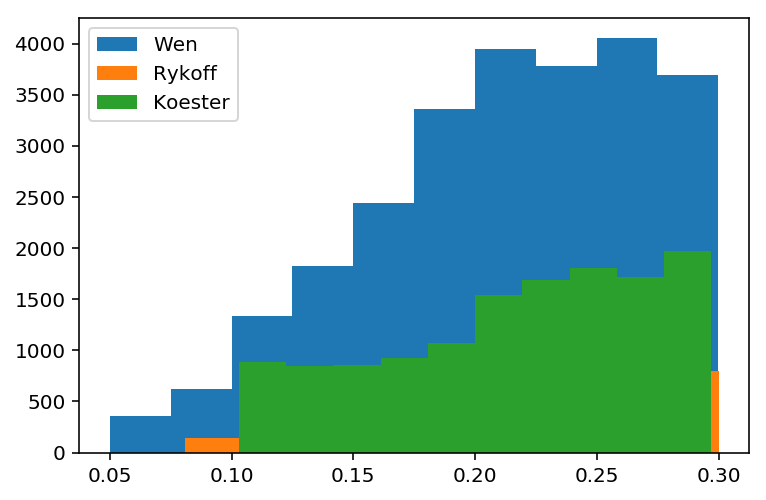

In [71]:
print w.colnames
print r.colnames
print k.colnames
plt.hist(w['zph'], label='Wen')
plt.hist(r['Z_LAMBDA'], label='Rykoff')
plt.hist(k['zph'], label='Koester')
plt.legend()

['WHL', 'RAJ2000', 'DEJ2000', 'zph', 'zsp', 'rmag', 'r200', 'RL*', 'N200', 'Other']
['ID', 'NAME', 'RA', 'DEC', 'Z_LAMBDA', 'Z_LAMBDA_ERR', 'LAMBDA', 'LAMBDA_ERR', 'S', 'Z_SPEC', 'OBJID', 'IMAG', 'IMAG_ERR', 'MODEL_MAG_U', 'MODEL_MAGERR_U', 'MODEL_MAG_G', 'MODEL_MAGERR_G', 'MODEL_MAG_R', 'MODEL_MAGERR_R', 'MODEL_MAG_I', 'MODEL_MAGERR_I', 'MODEL_MAG_Z', 'MODEL_MAGERR_Z', 'ILUM', 'P_CEN', 'RA_CEN', 'DEC_CEN', 'ID_CEN', 'PZBINS', 'PZ']
['RAJ2000', 'DEJ2000', 'zph', 'zsp', 'LBr', 'LBi', 'LTr', 'LTi', 'Ngal', 'NR200']


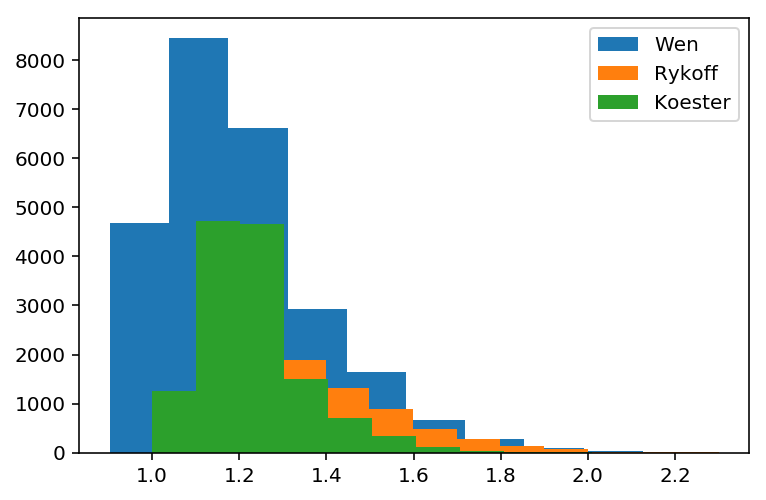

In [72]:
print w.colnames
print r.colnames
print k.colnames
plt.hist(np.log10(w['N200']), label='Wen')
plt.hist(np.log10(r['LAMBDA']), label='Rykoff')
plt.hist(np.log10(k['Ngal']), label='Koester')
plt.legend()

In [74]:
print("\033[43;30mValores de Ra, Dec e z de cada catalogo\033[m")
c_w = SkyCoord(ra = w['RAJ2000']*u.degree, dec = w['DEJ2000']*u.deg, distance = cosmo.comoving_distance(w['zph'])) 
c_r = SkyCoord(ra = r['RA']*u.deg, dec = r['DEC']*u.deg, distance = cosmo.comoving_distance(r['Z_LAMBDA']))
c_k = SkyCoord(ra = k['RAJ2000'], dec = k['DEJ2000'], distance = cosmo.comoving_distance(k['zph']))

Valores de Ra, Dec e z de cada catalogo


In [75]:
# Mpc dz=0.05 e 0.1 em funcao de z

d = cosmo.comoving_distance(0.05)
print d

d = cosmo.comoving_distance(0.1)
print d

213.887832857 Mpc
422.982356046 Mpc


# Match do Wen com o Rykoff

In [76]:
# Função distlim
# Acha a distribuição de indices por raio
lista_i = []
lista_r = []
for i in range(0,101000,10000):
    idxc_w, idxc_r, d2d, d3d = c_r.search_around_3d(c_w, i*u.kpc)
    lista_i.append(len(idxc_w))
    lista_r.append(i)

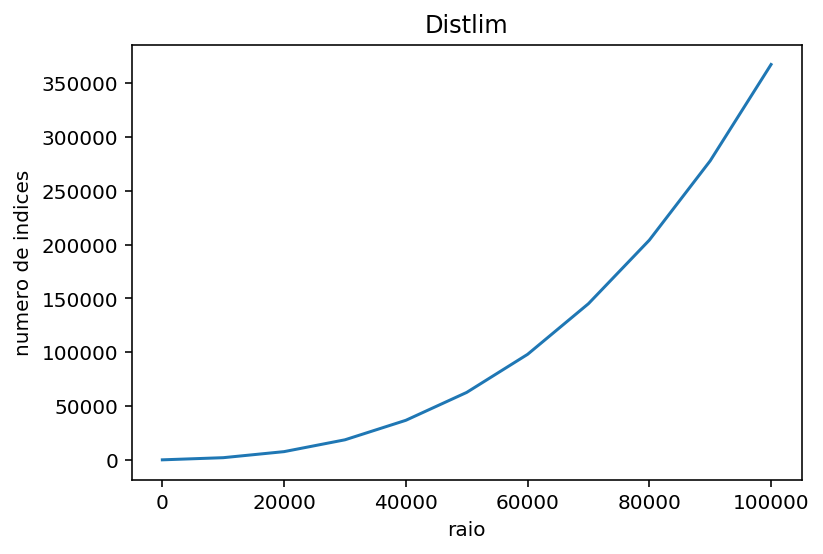

In [77]:
# Plot da função distlim
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(lista_r,lista_i)
plt.ylabel('numero de indices')
plt.xlabel('raio')
plt.title('Distlim')

In [78]:
print 'Objects around to catalog 3d'
idxc_w, idxc_r, d2d, d3d = c_r.search_around_3d(c_w, 20000*u.kpc)
print 'Números de objetos do wen =',len(idxc_w)
print 'Números de objetos do rykoff =',len(idxc_r)

Objects around to catalog 3d
Números de objetos do wen = 7624
Números de objetos do rykoff = 7624


(array([ 2657.,  1569.,  1630.,  1025.,   390.,   182.,    90.,    46.,
           31.,     4.]),
 array([  2.21105671e-07,   3.06407053e-01,   6.12813885e-01,
          9.19220717e-01,   1.22562755e+00,   1.53203438e+00,
          1.83844121e+00,   2.14484804e+00,   2.45125488e+00,
          2.75766171e+00,   3.06406854e+00]),
 <a list of 10 Patch objects>)

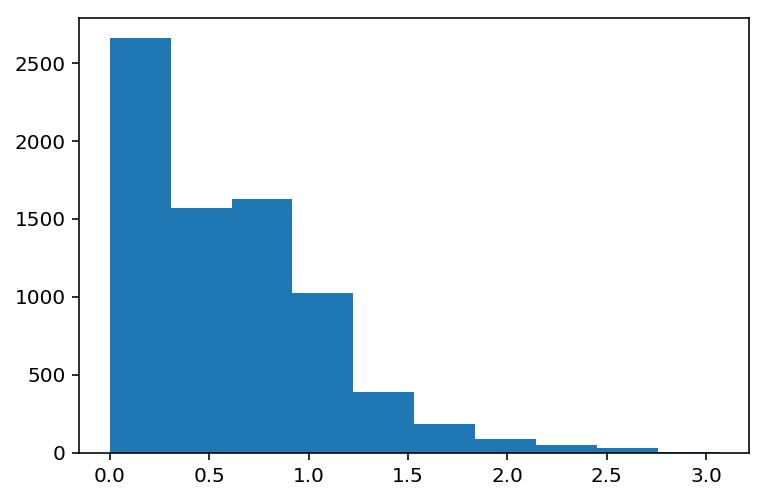

In [79]:
# Histograma de d2d - Números de objetos x distâcia em função de Ra e Dec 
plt.hist(d2d)

(array([  210.,   270.,   388.,   512.,   614.,   761.,   921.,  1139.,
         1352.,  1457.]),
 array([  0.0201999 ,   2.01796539,   4.01573088,   6.01349637,
          8.01126186,  10.00902735,  12.00679284,  14.00455833,
         16.00232382,  18.00008931,  19.9978548 ]),
 <a list of 10 Patch objects>)

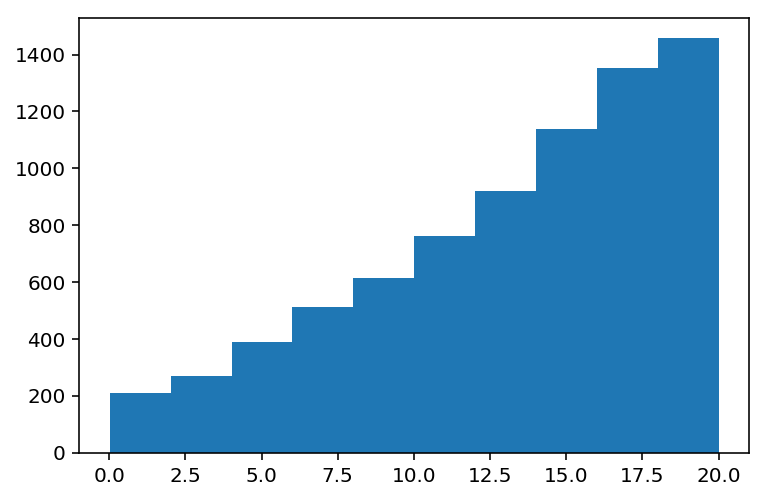

In [80]:
# Histograma 3d - Números de objetos x distâcia em função de Ra, Dec e z
plt.hist(d3d)

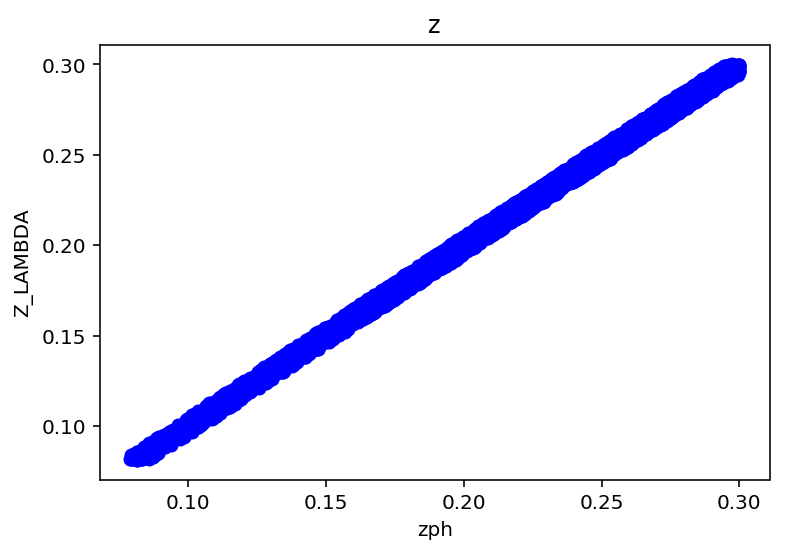

In [81]:
# Plot z vs z
iw = w[idxc_w]
ir = r[idxc_r]
zw = iw['zph']
zr = ir['Z_LAMBDA']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(zw,zr, 'bo')
plt.xlabel('zph')
plt.ylabel('Z_LAMBDA')
plt.title('z')

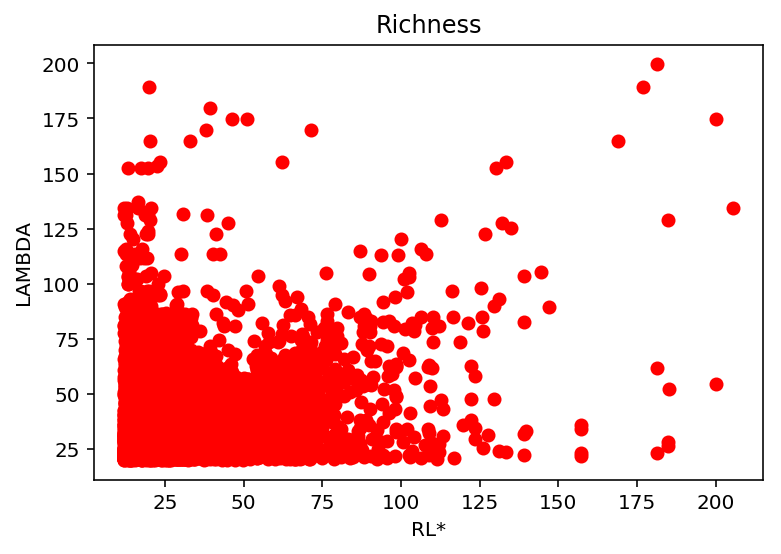

In [82]:
# Plor rich vs rich
rw = iw['RL*']
rr = ir['LAMBDA']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(rw,rr, 'ro')
plt.xlabel('RL*')
plt.ylabel('LAMBDA')
plt.title('Richness')

(0, 10)

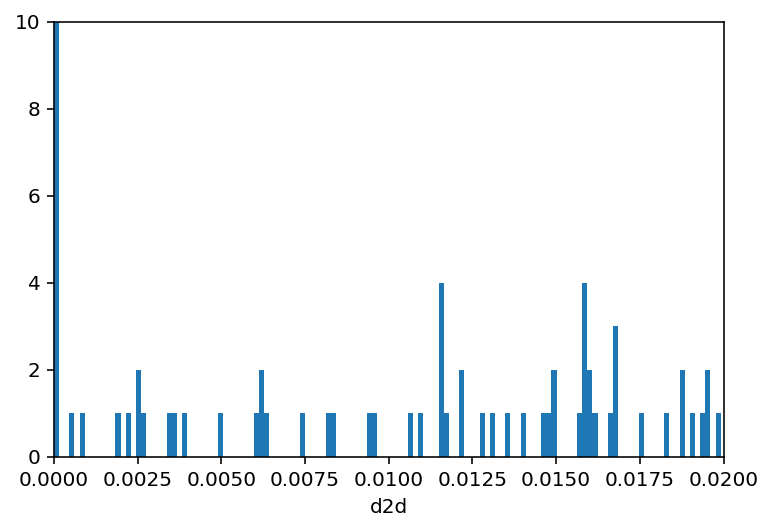

In [83]:
# Como a função search around pega os matches mais próximos em relação a cada objeto, muitos desses matches são
# repetidos e incorretos, fazendo um plot do d2d em função do raio, podemos chegar no número de matches aproximados.
plt.hist(d2d, bins=20000)
plt.xlabel('d2d')
plt.xlim(0,0.02)
plt.ylim(0,10)

In [84]:
# Aplica-se o raio encontrado, depois pega os resultados do match e retira apenas esses indices do catalogo 
# correspondente, em seguida chama-se os parametros relacionados a aqueles indices.
print len(np.unique(idxc_w))
print len(np.unique(idxc_r))
print len(idxc_w[d2d<0.002*u.deg])
print len(idxc_r[d2d<0.002*u.deg])

obje_wr = idxc_w[d2d<0.002*u.deg]
obje_rw = idxc_r[d2d<0.002*u.deg]

o_wr = w[obje_wr]
o_rw = r[obje_rw]

ra_wr = o_wr['RAJ2000']
dec_wr = o_wr['DEJ2000']
z_wr = o_wr['zph']

ra_rw = o_rw['RA']
dec_rw = o_rw['DEC']
z_rw = o_rw['Z_LAMBDA']

6018
3776
1520
1520


# Match do Wen com o Koester

In [85]:
# Função distlim
lista_i = []
lista_r = []
for i in range(0,101000,10000):
    idxc_w, idxc_k, d2d, d3d = c_k.search_around_3d(c_w, i*u.kpc)
    lista_i.append(len(idxc_w))
    lista_r.append(i)

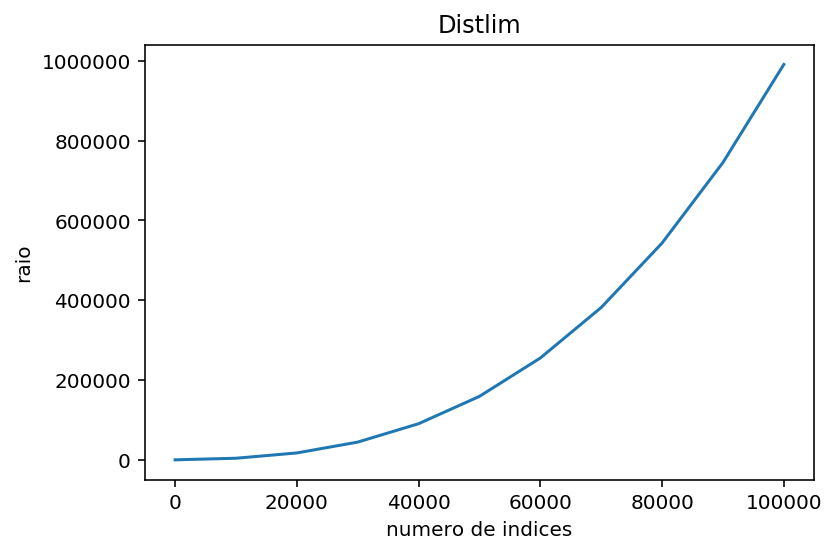

In [86]:
# Plot da função distlim
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(lista_r,lista_i)
plt.xlabel('numero de indices')
plt.ylabel('raio')
plt.title('Distlim')

In [87]:
print 'Objects around to catalog 3d'
idxc_w, idxc_k, d2d, d3d = c_k.search_around_3d(c_w, 17000*u.kpc)
print 'Números de objetos do wen =',len(idxc_w)
print 'Números de objetos do koester =',len(idxc_k)

Objects around to catalog 3d
Números de objetos do wen = 12090
Números de objetos do koester = 12090


(array([ 3477.,  1894.,  2297.,  2096.,  1141.,   571.,   335.,   171.,
           90.,    18.]),
 array([ 0.        ,  0.21779615,  0.43559229,  0.65338844,  0.87118458,
         1.08898073,  1.30677687,  1.52457302,  1.74236916,  1.96016531,
         2.17796145]),
 <a list of 10 Patch objects>)

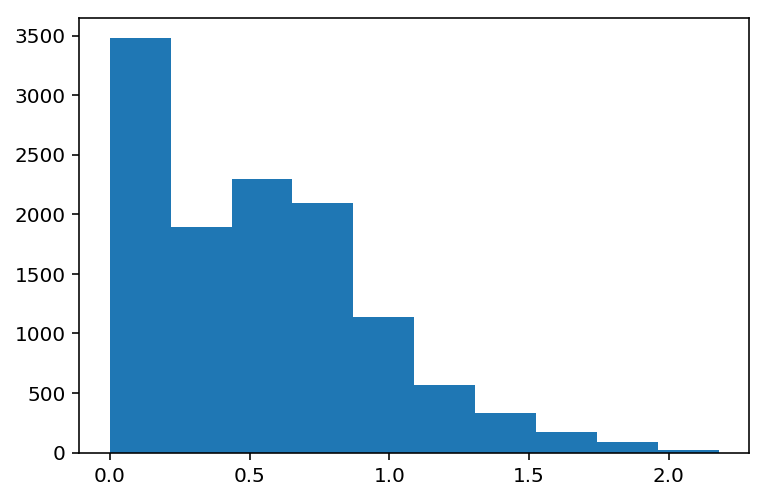

In [88]:
# Histograma de d2d - Números de objetos x distâcia em função de Ra e Dec 
plt.hist(d2d)

(array([  283.,   376.,   554.,   733.,   962.,  1247.,  1481.,  1839.,
         2131.,  2484.]),
 array([  8.28011216e-06,   1.69991504e+00,   3.39982180e+00,
          5.09972856e+00,   6.79963532e+00,   8.49954208e+00,
          1.01994488e+01,   1.18993556e+01,   1.35992624e+01,
          1.52991691e+01,   1.69990759e+01]),
 <a list of 10 Patch objects>)

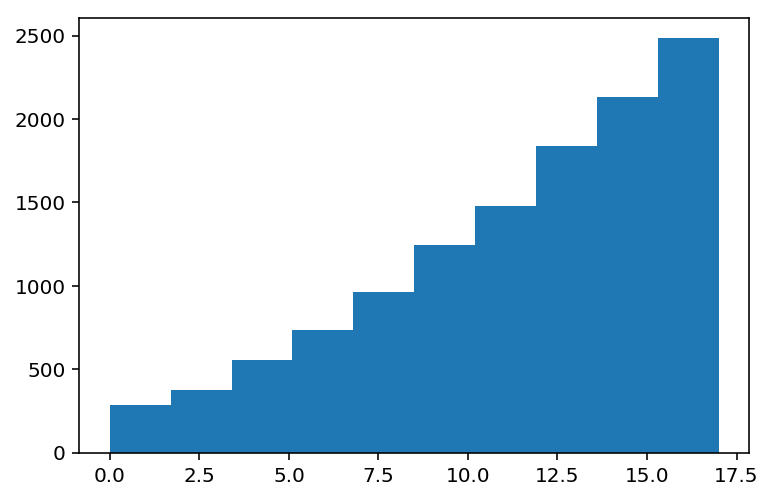

In [89]:
# Histograma 3d - Números de objetos x distâcia em função de Ra, Dec e z
plt.hist(d3d)

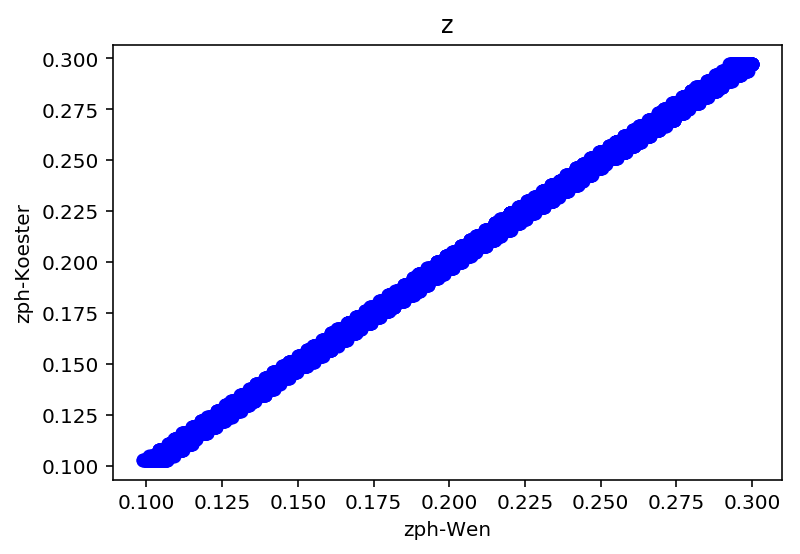

In [90]:
# Plot z vs z
iw = w[idxc_w]
ik = k[idxc_k]
zw = iw['zph']
zk = ik['zph']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(zw,zk, 'bo')
plt.xlabel('zph-Wen')
plt.ylabel('zph-Koester')
plt.title('z')

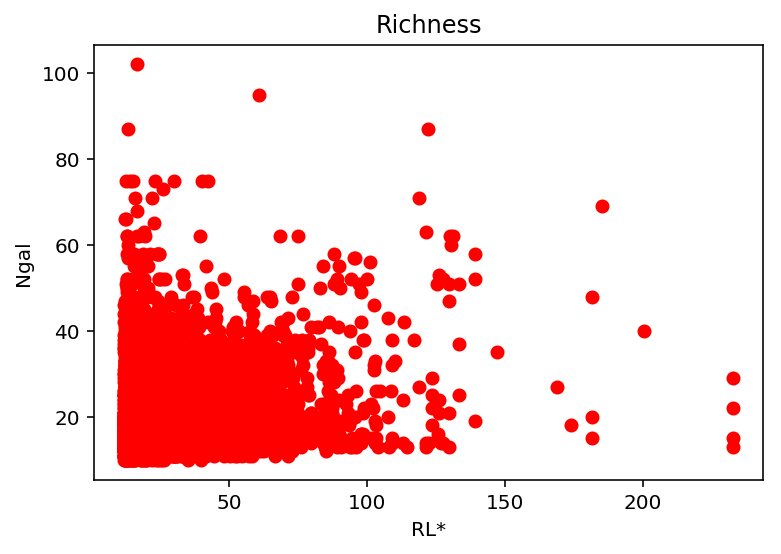

In [91]:
# Plor rich vs rich
rw = iw['RL*']
rk = ik['Ngal']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(rw,rk, 'ro')
plt.xlabel('RL*')
plt.ylabel('Ngal')
plt.title('Richness')

(0, 10)

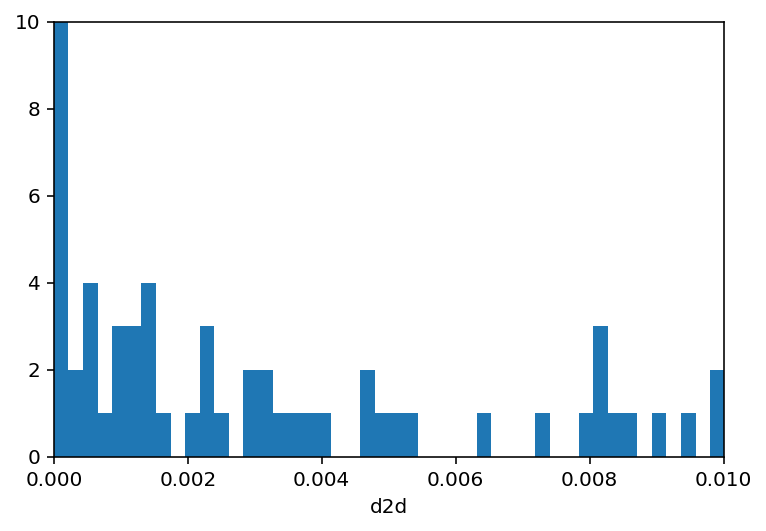

In [92]:
plt.hist(d2d, bins=10000)
plt.xlabel('d2d')
plt.xlim(0,0.01)
plt.ylim(0,10)

In [93]:
print len(np.unique(idxc_w))
print len(np.unique(idxc_k))
print len(idxc_w[d2d<0.002*u.deg])
print len(idxc_r[d2d<0.002*u.deg])

obje_wk = idxc_w[d2d<0.002*u.deg]
obje_kw = idxc_k[d2d<0.002*u.deg]

o_wk = w[obje_wk]
o_kw = k[obje_kw]

ra_wk = o_wk['RAJ2000']
dec_wk = o_wk['DEJ2000']
z_wk = o_wk['zph']

ra_kw = o_kw['RAJ2000']
dec_kw = o_kw['DEJ2000']
z_kw = o_kw['zph']

8498
7517
2070


/home/ogando/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 7624 but corresponding boolean dimension is 12090


IndexError: index 7626 is out of bounds for axis 1 with size 7624

# Match do Koester com o Rykoff

In [ ]:
# Função distlim
lista_i = []
lista_r = []
for i in range(0,101000,10000):
    idxc_r, idxc_k, d2d, d3d = c_k.search_around_3d(c_r, i*u.kpc)
    lista_i.append(len(idxc_r))
    lista_r.append(i)

In [ ]:
# Plot da função distlim
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(lista_r,lista_i)
plt.ylabel('numero de indices')
plt.xlabel('raio')
plt.title('Distlim')

In [ ]:
print 'Objects around to catalog 3d'
idxc_r, idxc_k, d2d, d3d = c_k.search_around_3d(c_r, 30000*u.kpc) 
print 'Números de objetos do rykoff =',len(idxc_r)
print 'Números de objetos do koester =',len(idxc_k)

In [ ]:
# Histograma de d2d - Números de objetos x distâcia em função de Ra e Dec 
plt.hist(d2d)

In [ ]:
# Histograma de d3d - Números de objetos x distâcia em função de Ra, Dec e z
plt.hist(d3d)

In [ ]:
# Plot z vs z
ir = r[idxc_r]
ik = k[idxc_k]
zr = ir['Z_LAMBDA']
zk = ik['zph']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(zr,zk, 'bo')
plt.xlabel('Z_LAMBDA')
plt.ylabel('zph')
plt.title('z')

In [ ]:
# Plor rich vs rich
rr = ir['LAMBDA']
rk = ik['Ngal']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(rr,rk, 'ro')
plt.xlabel('LAMBDA')
plt.ylabel('Ngal')
plt.title('Richness')

In [ ]:
plt.hist(d2d, bins=20000)
plt.xlabel('d2d')
plt.xlim(0,0.01)
plt.ylim(0,10)

In [ ]:
print len(np.unique(idxc_k))
print len(np.unique(idxc_r))
print len(idxc_k[d2d<0.002*u.deg])
print len(idxc_r[d2d<0.002*u.deg])

obje_kr = idxc_k[d2d<0.002*u.deg]
obje_rk = idxc_r[d2d<0.002*u.deg]

o_kr = k[obje_kr]
o_rk = r[obje_rk]

ra_kr = o_kr['RAJ2000']
dec_kr = o_kr['DEJ2000']
z_kr = o_kr['zph']

ra_rk = o_rk['RA']
dec_rk = o_rk['DEC']
z_rk = o_rk['Z_LAMBDA']

# Diagrama de Venn

In [ ]:
# Formatando wr
lista_wr = []
for i in range(0,len(o_wr)):
    lista_wr.append('%.1f_%.1f_%.1f'%(ra_wr[i], dec_wr[i], z_wr[i]))
print len(lista_wr)

In [ ]:
# Formatando rw
lista_rw = []
for i in range(0,len(o_rw)):
    lista_rw.append('%.1f_%.1f_%.1f'%(ra_rw[i], dec_rw[i], z_rw[i]))
print len(lista_rw)

In [ ]:
# Formatando wk
lista_wk = []
for i in range(0,len(o_wk)):
    lista_wk.append('%.1f_%.1f_%.1f'%(ra_wk[i], dec_wk[i], z_wk[i]))
print len(lista_wk)

In [ ]:
# Formatando kw
lista_kw = []
for i in range(0,len(o_kw)):
    lista_kw.append('%.1f_%.1f_%.1f'%(ra_kw[i], dec_kw[i], z_kw[i]))
print len(lista_kw)

In [ ]:
# Formatando kr
lista_kr = []
for i in range(0,len(o_kr)):
    lista_kr.append('%.1f_%.1f_%.1f'%(ra_kr[i], dec_kr[i], z_kr[i]))
print len(lista_kr)

In [ ]:
# Formatando rk
lista_rk = []
for i in range(0,len(o_rk)):
    lista_rk.append('%.1f_%.1f_%.1f'%(ra_rk[i], dec_rk[i], z_rk[i]))
print len(lista_rk)

In [ ]:
# Match de wk e wr
lista_wkr = []
for wk in lista_wk: 
    for wr in lista_wr:
        if wk==wr:
            lista_wkr.append(wk)
print len(lista_wkr)

In [ ]:
# Match de rw e rk
lista_rwk = []
for rw in lista_rw: 
    for rk in lista_rk:
        if rw==rk:
            lista_rwk.append(rw)
print len(lista_rwk)

In [ ]:
# Match de kw e kr
lista_kwr = []
for kw in lista_kw: 
    for kr in lista_kr:
        if kw==kr:
            lista_kwr.append(kw)
print len(lista_kwr)

In [ ]:
# Match de wk e rw
lista_wkrw = []
for wk in lista_wk: 
    for rw in lista_rw:
        if wk==rw:
            lista_wkrw.append(wk)
print len(lista_wkrw)

In [ ]:
# Match de wk e rk
lista_wkrk = []
for wk in lista_wk: 
    for rk in lista_rk:
        if wk==rk:
            lista_wkrk.append(wk)
print len(lista_wkrk)

In [ ]:
# Match de wk e kw
lista_wkkw = []
for wk in lista_wk: 
    for kw in lista_kw:
        if wk==kw:
            lista_wkkw.append(wk)
print len(lista_wkkw)

In [ ]:
# Match de wk e kr
lista_wkkr = []
for wk in lista_wk: 
    for kr in lista_kr:
        if wk==kr:
            lista_wkkr.append(wk)
print len(lista_wkkr)

In [ ]:
# Match de rw e wr
lista_rwwr = []
for rw in lista_rw: 
    for wr in lista_wr:
        if rw==wr:
            lista_rwwr.append(wr)
print len(lista_rwwr)

In [ ]:
# Match de rw e kw
lista_rwkw = []
for rw in lista_rw: 
    for kw in lista_kw:
        if rw==kw:
            lista_rwkw.append(rw)
print len(lista_rwkw)

In [ ]:
# Match de rw e kr
lista_rwkr = []
for rw in lista_rw: 
    for kr in lista_kr:
        if rw==kr:
            lista_rwkr.append(rw)
print len(lista_rwkr)

In [ ]:
# Match de wr e rk
lista_wrrk = []
for rk in lista_rk: 
    for wr in lista_wr:
        if rk==wr:
            lista_wrrk.append(rk)
print len(lista_wrrk)

In [ ]:
# Match de wr e kw
lista_wrkw = []
for kw in lista_kw: 
    for wr in lista_wr:
        if kw==wr:
            lista_wrkw.append(kw)
print len(lista_wrkw)

In [ ]:
# Match de wr e kr
lista_wrkr = []
for kr in lista_kr: 
    for wr in lista_wr:
        if kr==wr:
            lista_wrkr.append(kr)
print len(lista_wrkr)

In [ ]:
# Match de rk e kw
lista_rkkw = []
for rk in lista_rk: 
    for kw in lista_kw:
        if rk==kr:
            lista_rkkw.append(rk)
print len(lista_rkkw)

In [ ]:
# Match de rk e kr
lista_rkkr = []
for rk in lista_rk: 
    for kr in lista_kr:
        if rk==kr:
            lista_rkkr.append(kr)
print len(lista_rkkr)

In [ ]:
# Match de wr, kr e rk
lista_wrkrrk = []
for rkkr in lista_rkkr: 
    for wr in lista_wr:
        if rkkr==wr:
            lista_wrkrrk.append(wr)
print len(lista_wrkrrk)

In [ ]:
# Match de wk, kr e rk
lista_wkkrrk = []
for rkkr in lista_rkkr: 
    for wk in lista_wk:
        if rkkr==wk:
            lista_wkkrrk.append(wk)
print len(lista_wkkrrk)

In [ ]:
# Match de rw, kr e rk
lista_rwkrrk = []
for rkkr in lista_rkkr: 
    for rw in lista_rw:
        if rkkr==rw:
            lista_rwkrrk.append(rw)
print len(lista_rwkrrk)

In [ ]:
# Match de kw, kr e rk
lista_kwkrrk = []
rkkr = range(0,len(lista_rkkr))
kw = range(0,len(lista_kw))
for rkkr in lista_rkkr: 
    for kw in lista_kw:
        if rkkr==kw:
            lista_kwkrrk.append(kw)
print len(lista_kwkrrk)

In [ ]:
# Formatando Wen
ra_w = w['RAJ2000']
dec_w = w['DEJ2000']
z_w = w['zph']
lista_w = []
for i in range(0,len(w)):
    lista_w.append('%.1f_%.1f_%.1f'%(ra_w[i], dec_w[i], z_w[i]))
print len(lista_w)

In [ ]:
# Formatando Rykoff
ra_r = r['RA']
dec_r = r['DEC']
z_r = r['Z_LAMBDA']
lista_r = []
for i in range(0,len(r)):
    lista_r.append('%.1f_%.1f_%.1f'%(ra_r[i], dec_r[i], z_r[i]))
print len(lista_r)

In [ ]:
# Formatando Koester
ra_k = k['RAJ2000']
dec_k = k['DEJ2000']
z_k = k['zph']
lista_k = []
for i in range(0,len(k)):
    lista_k.append('%.1f_%.1f_%.1f'%(ra_k[i], dec_k[i], z_k[i]))
print len(lista_k)

In [ ]:
print("\033[43;30mDiagrama de Venn\033[m")
Wen = set(lista_w)
Rykoff = set(lista_r)
Koester = set(lista_k)
venn3([Wen, Rykoff, Koester], ('Wen', 'Rykoff', 'Koester'))
plt.show()